In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import matplotlib as plt
%pylab inline
import random
import seaborn as sns
from sklearn.utils import resample
from matplotlib import rcParams
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-kzrz1tlb
  Running command git clone -q https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-kzrz1tlb
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.


In [4]:
from sklearn.model_selection import cross_val_score
from pyearth import Earth

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
X = pd.read_fwf('/content/drive/MyDrive/Sandeep_and_Harish_work/sensitivityruns/data_for_GMD/MARS_and_Sobol_data/input_parameters_MARS_Sobol.txt',header=None)
X = pd.concat([X.iloc[:,0:14],X.iloc[:,15:]],axis=1)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24
0,0.0879,0.2807,0.1890,0.6511,0.2338,0.5177,0.4370,0.5888,0.0301,0.8195,0.6544,0.7529,0.2128,0.8716,0.7645,0.0646,0.5739,0.8696,0.9242,0.6375,0.6789,0.3913,0.4369,0.4186
1,0.5153,0.7686,0.6757,0.5967,0.9500,0.5352,0.0456,0.2252,0.5742,0.8978,0.6199,0.5928,0.9958,0.0723,0.8371,0.9858,0.2579,0.8629,0.5034,0.3296,0.4936,0.0931,0.8548,0.6775
2,0.3943,0.7704,0.0529,0.0090,0.0083,0.0688,0.9996,0.4619,0.7841,0.5631,0.9313,0.6107,0.0258,0.7818,0.7701,0.5131,0.8486,0.0055,0.0146,0.1163,0.5348,0.1600,0.4304,0.2770
3,0.9446,0.0434,0.1577,0.5616,0.1896,0.5129,0.3456,0.1049,0.1073,0.3080,0.0194,0.0443,0.5737,0.0143,0.6521,0.7795,0.9952,0.0839,0.9828,0.6451,0.5836,0.4598,0.1285,0.5187
4,0.2402,0.6999,0.1658,0.3759,0.7166,0.1432,0.6049,0.3403,0.9557,0.4347,0.8471,0.4167,0.2357,0.0292,0.9426,0.3507,0.9338,0.2757,0.5799,0.5207,0.4799,0.2266,0.7071,0.2558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.7200,0.3279,0.9909,0.0051,0.3415,0.6969,0.6484,0.2871,0.1547,0.4594,0.2620,0.7938,0.1909,0.8634,0.3194,0.7340,0.3326,0.8797,0.4923,0.7535,0.1244,0.9696,0.3116,0.0283
246,0.2713,0.5085,0.6870,0.3099,0.1405,0.1688,0.4549,0.9789,0.9867,0.3027,0.1342,0.3405,0.0069,0.4022,0.7018,0.0780,0.3409,0.6678,0.8736,0.1796,0.6668,0.6349,0.6454,0.5673
247,0.7647,0.8047,0.2780,0.6781,0.1725,0.6587,0.7479,0.1495,0.7002,0.0661,0.8176,0.8944,0.8777,0.1477,0.0648,0.6901,0.8032,0.5433,0.8363,0.8531,0.5051,0.0842,0.7266,0.5565
248,0.0027,0.4330,0.0732,0.0001,0.1678,0.9175,0.2974,0.6741,0.4885,0.5709,0.6826,0.5682,0.4015,0.7462,0.2264,0.5925,0.2173,0.8426,0.5501,0.6062,0.5598,0.6600,0.5111,0.5459


In [7]:
Y = pd.read_excel('/content/drive/MyDrive/Sandeep_and_Harish_work/sensitivityruns/data_for_GMD/MARS_and_Sobol_data/output_variables_MARS_Sobol_runs.xlsx',sheet_name='RMSE_variables',nrows=250,usecols = 'B:I')
Y

,WS10,SAT,SAP,RAIN,PBLH,OLR,DSWRF,DLWRF
0,2.722384,2.328833,923.620423,8.320000,388.357200,52.951052,126.561389,23.596080
1,2.332926,2.074557,919.679384,8.980714,388.174131,52.892022,143.018048,19.360958
2,3.045440,2.541654,922.728494,7.875313,389.717209,52.462319,120.150382,22.696423
3,2.868819,2.384805,921.612134,8.510566,388.918008,52.211615,148.857439,21.381934
4,2.673051,2.243006,919.469351,7.924683,382.371321,51.936048,140.067615,20.100543
...,...,...,...,...,...,...,...,...
245,2.271949,2.308478,925.976314,8.201370,385.797599,54.516736,121.394565,23.346654
246,2.315647,2.079771,922.183060,8.144154,374.233830,54.454176,126.689549,20.618247
247,2.572847,2.254726,922.197317,8.628788,399.124852,61.342643,130.509279,21.368687
248,2.972289,2.249624,924.608892,8.566329,387.909723,54.808774,122.192953,22.957464


In [18]:
i=0
y = Y.iloc[:,i]
y = (y-y.min(axis=0))/(y.max(axis=0)-y.min(axis=0))
model = Earth(max_terms=500,max_degree = 1,feature_importance_type=['gcv','rss','nb_subsets'])
model.fit(X, y)
y_hat = model.predict(X)
print(model.summary())
print(model.feature_importances_['rss'])

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      0.514335     
h(2-0.3138)     No      -0.481376    
h(0.3138-2)     No      1.12703      
3               No      -0.252123    
22              No      -0.171585    
h(1-0.5594)     No      -0.0898613   
h(0.5594-1)     No      0.17264      
h(4-0.3714)     No      -0.0265827   
h(0.3714-4)     No      0.163661     
h(6-0.7672)     Yes     None         
h(0.7672-6)     No      0.0742215    
5               No      0.047999     
13              No      0.0331561    
24              No      0.0328348    
23              No      -0.0278466   
h(8-0.2735)     Yes     None         
h(0.2735-8)     No      0.0918092    
-------------------------------------
MSE: 0.0006, GCV: 0.0009, RSQ: 0.9865, GRSQ: 0.9817
[0.00000000e+00 3.31786966e-02 7.79966267e-01 1.13726975e-01
 1.01838613e-02 4.94703138e-03 6.04570472e-03 0.00000000e+00
 7.64690197e-04 

In [ ]:
rss = np.zeros((1,24))
for i in range(8):
  y = Y.iloc[:,i]
  y = (y-y.min(axis=0))/(y.max(axis=0)-y.min(axis=0))
  model = Earth(feature_importance_type=['gcv','rss','nb_subsets'])
  model.fit(X, y)
  y_hat = model.predict(X)
  dmy = model.feature_importances_['rss']
  dmy = dmy.reshape((1,24))
  rss = np.append(rss,dmy,axis=0)
rss = rss[1:,:]
rss.shape

(8, 24)

In [ ]:
df = pd.DataFrame(data=rss,
                    index=['WS10','SAT','SAP','RAIN','PBLH','OLR','DSWRF','DLWRF'],
                    columns=['P1', 'P2', 'P3','P4', 'P5', 'P6','P7', 'P8', 'P9','P10',
              'P11', 'P12', 'P13','P14', 'P15','P16','P17', 'P18', 'P19','P20',
              'P21', 'P22', 'P23','P24'])
df_t = df.T
df_t = (df_t-df_t.min())/(df_t.max()-df_t.min())
df = df_t.T

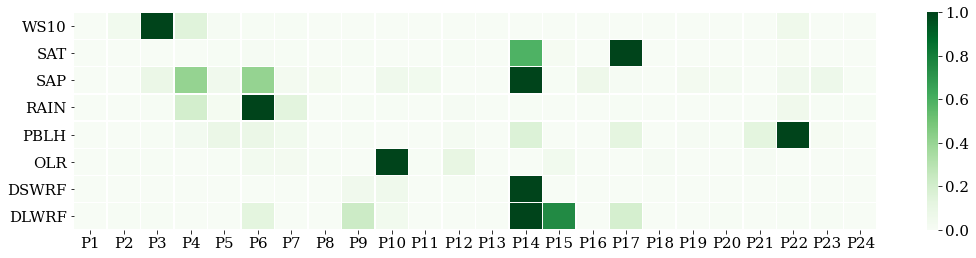

In [ ]:
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
ax = plt.figure(figsize=(18,4))
ax = sns.heatmap(df,cmap="Greens",linewidths=.5)
plt.xticks(rotation='horizontal')
plt.savefig('/content/drive/MyDrive/Sandeep_and_Harish_work/sensitivityruns/data_for_GMD/MARS_and_Sobol_data/MARS_heatmap.pdf',dpi=1200,bbox_inches='tight',pad_inches=0.1)

In [ ]:
df.sum(axis=0).sort_values(ascending=False)

P14    3.769637
P6     1.678252
P17    1.335920
P22    1.192590
P10    1.162344
P3     1.124786
P15    0.817969
P4     0.788441
P9     0.301381
P7     0.260191
P5     0.187177
P12    0.162398
P21    0.145621
P23    0.102418
P16    0.069348
P2     0.059460
P11    0.045829
P19    0.041308
P20    0.036672
P8     0.033772
P24    0.021466
P18    0.018819
P13    0.002077
P1     0.001935
dtype: float64

In [ ]:
SI = df.sum(axis=0).sort_values(ascending=False)
SI.to_csv(r'/content/drive/MyDrive/Sandeep_and_Harish_work/sensitivityruns/data_for_GMD/MARS_and_Sobol_data/MARS_SI.csv',header=None,index=True)

In [ ]:
rss_prob = np.zeros((1,24))
for i in range(8):
  rss = np.zeros((1,24))
  X_y = pd.concat([X, Y.loc[:,Y.columns[i]]], axis=1)
  for j in range(100):
    bootstrap = resample(X_y)
    x = bootstrap.iloc[:,0:24]
    y = bootstrap.loc[:,Y.columns[i]]
    model = Earth(feature_importance_type=['gcv','rss'])
    model.fit(x, y)
    print(model.feature_importances_['rss'])
    dmy = model.feature_importances_['gcv']
    dmy = dmy.reshape((1,24))
    rss = np.append(rss,dmy,axis=0)
  rss = rss[1:,:]
  rss_prob = np.append(rss_prob,rss,axis=0)

[0.00000000e+00 3.13497242e-02 8.23451950e-01 7.24310740e-02
 7.78226552e-03 4.03035511e-03 5.01481337e-03 0.00000000e+00
 9.18202102e-04 1.38633785e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.70608419e-03 0.00000000e+00 0.00000000e+00
 1.05215928e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.91937984e-02 1.12320317e-03 5.60032626e-04]
[0.         0.03708321 0.78772198 0.11602571 0.00728821 0.01104779
 0.00627486 0.         0.         0.         0.         0.
 0.         0.00171073 0.         0.         0.         0.
 0.         0.         0.         0.03140045 0.00144706 0.        ]
[0.00000000e+00 2.08642163e-02 8.04171191e-01 1.03053094e-01
 1.41758230e-02 2.73304950e-03 6.37312829e-03 7.02559892e-04
 1.73015166e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.37988864e-02 1.38187427e-03 1.01602598e-03]
[0.00000000e+

In [ ]:
rss_prob = rss_prob[1:]
rss_prob.shape

(800, 24)

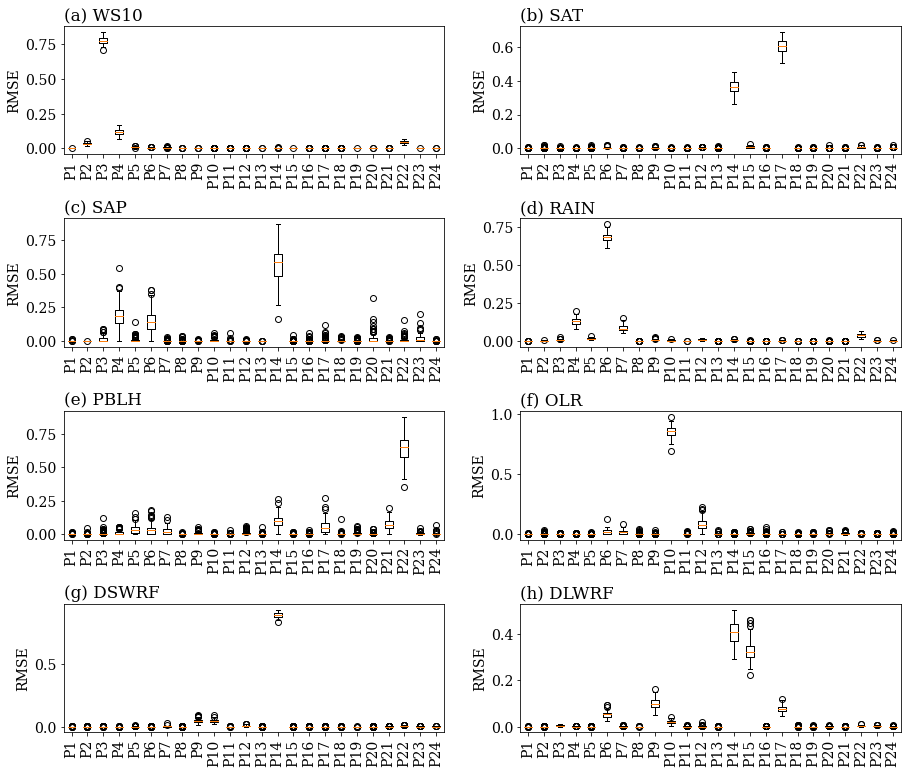

In [ ]:
fig = plt.figure(figsize=(15,13))
plt.rc('font', size=14)    # fontsize of the all text
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('xtick', labelsize=14) 
abc = ['(a) ','(b) ','(c) ','(d) ','(e) ','(f) ','(g) ','(h) ']
i=0
for i in range(8):
  ax = fig.add_subplot(4,2,i+1)
  ax.boxplot(rss_prob[i*100:(i+1)*100,:])
  ax.set_title(abc[i]+df.index[i],loc='left')
  ax.set_xticklabels(['P1', 'P2', 'P3','P4', 'P5', 'P6','P7', 'P8', 'P9','P10',
                'P11', 'P12', 'P13','P14', 'P15', 'P16','P17', 'P18', 'P19','P20',
                'P21', 'P22', 'P23','P24'],rotation='vertical')
  ax.set_ylabel('RMSE')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.savefig('/content/drive/MyDrive/Sandeep_and_Harish_work/sensitivityruns/data_for_GMD/MARS_and_Sobol_data/MARS_boxplot.pdf',dpi=1200,bbox_inches='tight',pad_inches=0.1)

In [ ]:
df.index

Index(['WS10', 'SAT', 'SAP', 'RAIN', 'PBLH', 'OLR', 'DSWRF', 'DLWRF'], dtype='object')